#THE SETUP

# Check if the file has been uploaded

In [0]:
dbutils.fs.ls("/FileStore/tables")

[FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706707554000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707579000),
 FileInfo(path='dbfs:/FileStore/tables/clinical_trial_file.csv/', name='clinical_trial_file.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020', name='clinicaltrial_2020', size=46318151, modificationTime=1709585826000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1709585681000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-10.zip', name='clinicaltrial_2020-10.zip', size=10599182, modificationTime=1710096609000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-11.zip', name='clinicaltrial_

# Defining my variable

In [0]:
fileroot = "clinicaltrial_2023"
pharma = "pharma"

#Copy to the temp folder

In [0]:
dbutils.fs.cp("/FileStore/tables/" + fileroot + ".zip", "file:/tmp/")
dbutils.fs.cp("/FileStore/tables/" + pharma + ".zip", "file:/tmp/")

True

#  Making the variable accessible by the command line

In [0]:
import os
os.environ['fileroot'] = fileroot

import os
os.environ['pharma'] = pharma

# List the contents of the temporary directory

In [0]:
%sh

ls /tmp/

Rserv
Rtmpb5iDBi
chauffeur-daemon-params
chauffeur-daemon.pid
chauffeur-env.sh
clinicaltrial_2023.zip
custom-spark.conf
driver-daemon-params
driver-daemon.pid
driver-env.sh
hsperfdata_root
pharma.zip
python_lsp_logs
systemd-private-d2ffb90040804754a122110d5f59a422-systemd-logind.service-DpmX4X
systemd-private-d2ffb90040804754a122110d5f59a422-systemd-resolved.service-ddWvuU
tmp.cS8ly7D2cO


# Unzip the files

In [0]:
%sh

unzip -d /tmp/ /tmp/$fileroot.zip
unzip -d /tmp/ /tmp/$pharma.zip

Archive:  /tmp/clinicaltrial_2023.zip
  inflating: /tmp/clinicaltrial_2023.csv  
Archive:  /tmp/pharma.zip
  inflating: /tmp/pharma.csv         


# Checking the unzipped files

In [0]:
%sh

ls /tmp/$fileroot.csv
ls /tmp/$pharma.csv

/tmp/clinicaltrial_2023.csv
/tmp/pharma.csv


# Creating the new DBFS directory

In [0]:
dbutils.fs.mkdirs("/FileStore/tables/" + fileroot)
dbutils.fs.mkdirs("/FileStore/tables/" + pharma)

True

# Moving the file to the new DBFS


In [0]:
dbutils.fs.mv("file:/tmp/" + fileroot + ".csv", "/FileStore/tables/" + fileroot + ".csv", True)
dbutils.fs.mv("file:/tmp/" + pharma + ".csv", "/FileStore/tables/" + pharma + ".csv", True)

True

# Check to confirm that the files are in the directory

In [0]:
dbutils.fs.ls("/FileStore/tables/")

[FileInfo(path='dbfs:/FileStore/tables/accounts.zip', name='accounts.zip', size=5297592, modificationTime=1706707554000),
 FileInfo(path='dbfs:/FileStore/tables/activations/', name='activations/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/activations.zip', name='activations.zip', size=8411369, modificationTime=1706707579000),
 FileInfo(path='dbfs:/FileStore/tables/clinical_trial_file.csv/', name='clinical_trial_file.csv/', size=0, modificationTime=0),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020', name='clinicaltrial_2020', size=46318151, modificationTime=1709585826000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-1.zip', name='clinicaltrial_2020-1.zip', size=10599182, modificationTime=1709585681000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-10.zip', name='clinicaltrial_2020-10.zip', size=10599182, modificationTime=1710096609000),
 FileInfo(path='dbfs:/FileStore/tables/clinicaltrial_2020-11.zip', name='clinicaltrial_

# View the content of our clinical trial dataset

In [0]:
dbutils.fs.head("/FileStore/tables/" + fileroot + ".csv")

[Truncated to first 65536 bytes]


'"Id\tStudy Title\tAcronym\tStatus\tConditions\tInterventions\tSponsor\tCollaborators\tEnrollment\tFunder Type\tType\tStudy Design\tStart\tCompletion",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,\r\n"NCT03630471\tEffectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India\tPRIDE\tCOMPLETED\tMental Health Issue (E.G.", Depression, Psychosis, Personality Disorder," Substance Abuse)\tBEHAVIORAL: PRIDE \'Step 1\' problem-solving intervention|BEHAVIORAL: Enhanced usual care\tSangath\tHarvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine\t250.0\tOTHER\tINTERVENTIONAL\tAllocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR"," OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT\t2018-08-20\t2019-02-28",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

# CREATE RDD FOR CLINICAL TRIALS

# defines a function to read and convert the clinicaltrial data into RDD

In [0]:
def load_clinical_trial_data(clinicaltrial_2023):
    """
    Load clinical trial data from a CSV file into an RDD.

    Parameters:
        clinicaltrial_2023 (str): The name of the CSV file to load.

    Returns:
        pyspark.rdd.RDD: An RDD containing the clinical trial data.
    """
    crdd = sc.textFile("/FileStore/tables/" + clinicaltrial_2023 + ".csv")
    return crdd

# CREATE RDD FOR pharmaceutical data

# defines a function to read and convert the pharmaceutical data into RDD

In [0]:
def load_pharma_data(pharma):
    """
    Load pharmaceutical data from a CSV file into an RDD.

    Parameters:
        pharma (str): The name of the pharmaceutical data CSV file.

    Returns:
        pyspark.rdd.RDD: An RDD containing the pharmaceutical data.
    """
    prdd = sc.textFile("/FileStore/tables/" + pharma + ".csv")
    return prdd

# Removing the delimeters


In [0]:
delimiter_selector = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": "|",
    "clinicaltrial_2020": "|",
    "pharma": ","
}

def clean_clinical_rdd(crdd, clinicaltrial_2023):
    """
    Clean the clinical trial RDD by splitting each line using the delimiter
    specified by the file type and removing unwanted characters.

    Parameters:
        crdd (pyspark.rdd.RDD): The RDD containing clinical trial data.
        clinicaltrial_2023 (str): The name of the clinical trial file.

    Returns:
        pyspark.rdd.RDD: The cleaned RDD.
    """
    CLEAN_CRDD = crdd.map(lambda x: x.split(delimiter_selector[clinicaltrial_2023])).map(lambda x: [i.replace(",",'').replace('"','')for i in x])
    return CLEAN_CRDD

def clean_pharma_rdd(prdd, pharma):
    """
    Clean the pharmaceutical RDD by splitting each line using the delimiter
    specified by the file type and removing unwanted characters.

    Parameters:
        prdd (pyspark.rdd.RDD): The RDD containing pharmaceutical data.
        pharma_file (str): The name of the pharmaceutical file.

    Returns:
        pyspark.rdd.RDD: The cleaned RDD.
    """
    CLEAN_PRDD = prdd.map(lambda x: x.split(delimiter_selector[pharma])).map(lambda x: [i.replace(",",'').replace('"','')for i in x])
    return CLEAN_PRDD

# Creating new RDD  after cleaning the data

In [0]:
# Creating new RDD  after cleaning the data

# Creating the new RDD
Clinical_RDD = load_clinical_trial_data(fileroot)
PHARMA_RDD = load_pharma_data(pharma)

# Cleaning the RDD
Clinical_RDD_Clean = clean_clinical_rdd(Clinical_RDD, fileroot)
PHARMA_RDD_Clean = clean_pharma_rdd(PHARMA_RDD, pharma)

# Take first 5 elements from cleaned Clinical RDD
Clinical_RDD_Clean.take(5)

[['Id',
  'Study Title',
  'Acronym',
  'Status',
  'Conditions',
  'Interventions',
  'Sponsor',
  'Collaborators',
  'Enrollment',
  'Funder Type',
  'Type',
  'Study Design',
  'Start',
  'Completion'],
 ['NCT03630471',
  'Effectiveness of a Problem-solving Intervention for Common Adolescent Mental Health Problems in India',
  'PRIDE',
  'COMPLETED',
  'Mental Health Issue (E.G. Depression Psychosis Personality Disorder Substance Abuse)',
  "BEHAVIORAL: PRIDE 'Step 1' problem-solving intervention|BEHAVIORAL: Enhanced usual care",
  'Sangath',
  'Harvard Medical School (HMS and HSDM)|London School of Hygiene and Tropical Medicine',
  '250.0',
  'OTHER',
  'INTERVENTIONAL',
  'Allocation: RANDOMIZED|Intervention Model: PARALLEL|Masking: DOUBLE (INVESTIGATOR OUTCOMES_ASSESSOR)|Primary Purpose: TREATMENT',
  '2018-08-20',
  '2019-02-28'],
 ['NCT05992571',
  'Oral Ketone Monoester Supplementation and Resting-state Brain Connectivity',
  '',
  'RECRUITING',
  'Cerebrovascular Function|Cog

# PROBLEM ANSWERS

In [0]:
# QUESTION 1: NUMBER OF STUDIES IN THE DATASET

header = Clinical_RDD.first()

# Extract study names and count distinct studies
num_studies = (
    Clinical_RDD
    .filter(lambda row: row != header)      
    .distinct()                   
    .count()                      
)

print("Number of studies in the dataset:", num_studies)

Number of studies in the dataset: 483422


In [0]:
# Using user defined functionto find the distinct count
from pyspark.sql import Row

def count_distinct_rows(rdd, header_row):
    # Define a function to check if a row is equal to the header
    def is_not_header(row):
        return row != header_row

    # Filter out the header and count the distinct rows
    distinct_count = rdd.filter(is_not_header).distinct().count()

    return distinct_count

# Assuming Clinical_RDD is your RDD and header is the first row
header = Clinical_RDD.first()

# Convert the header to a Row object for compatibility
header_row = Row(*header)

# Get the distinct count of rows
distinct_count = count_distinct_rows(Clinical_RDD, header_row)

# Print the distinct count
print("Number of distinct rows (excluding header):", distinct_count - 1)

Number of distinct rows (excluding header): 483422


In [0]:
# QUESTION TWO: ALL TYPES OF TRIALS & THEIR FREQUENCY

type_of_trial = Clinical_RDD_Clean.first().index('Type')
Clinical_RDD_Clean.filter(lambda x: len(x) > type_of_trial + 1).map(lambda x: (x[type_of_trial], 1)).filter(lambda row: row[0] != 'Type').reduceByKey(lambda a,b: a + b).filter(lambda x: x[0] != '').sortBy(lambda x: x[1], ascending=False).collect()

[('INTERVENTIONAL', 371382),
 ('OBSERVATIONAL', 110221),
 ('EXPANDED_ACCESS', 928)]

In [0]:
# QUESTION 3: TOP 5 CONDITIONS WITH THEIR FREQUENCIES

conditions_delimeter = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": ",",
    "clinicaltrial_2020": ",",
}
conditions_column_index = Clinical_RDD_Clean.first().index('Conditions')

Clinical_RDD_Clean.flatMap(lambda x: x[conditions_column_index].split(conditions_delimeter[fileroot])).filter(lambda row: row != 'Conditions').filter(lambda row: row != '').map(lambda x: (x, 1)).reduceByKey(lambda a,b: a + b).sortBy(lambda x: x[1], ascending=False).take(5)

[('Healthy', 7997),
 ('Breast Cancer', 4556),
 ('Prostate Cancer', 2650),
 ('Asthma', 2309),
 ('Obesity', 2284)]

In [0]:
# QUESTION 4,  TOP 10 NON - PHARMA COMPANIES

clinical_trial_sponsor_col_index = Clinical_RDD_Clean.first().index('Sponsor')

parent_pharm_comp = PHARMA_RDD_Clean.map(lambda x: x[1].replace('"', ''))

Clinical_RDD_Clean.map(lambda x: x[clinical_trial_sponsor_col_index]).filter(lambda row: row != 'Sponsor').subtract(PHARMA_RDD_Clean.map(lambda x: x[1].replace('"', ''))).map(lambda x: (x, 1)).reduceByKey(lambda x, y: x + y).sortBy(lambda x: x[1], ascending=False).take(10)

[('National Cancer Institute (NCI)', 3410),
 ('Assiut University', 3335),
 ('Cairo University', 3023),
 ('Assistance Publique - Hôpitaux de Paris', 2951),
 ('Mayo Clinic', 2766),
 ('M.D. Anderson Cancer Center', 2702),
 ('Novartis Pharmaceuticals', 2393),
 ('National Institute of Allergy and Infectious Diseases (NIAID)', 2340),
 ('Massachusetts General Hospital', 2263),
 ('National Taiwan University Hospital', 2181)]

In [0]:
# QUESTION 5 The completed trial for 2023
# Assuming month_selector, ct_completion_col_index, ct_status_col_index, year, and CLINICAL_RDD_Clean are defined
year = {
    "clinicaltrial_2020": "2020",
    "clinicaltrial_2021": "2021",
    "clinicaltrial_2023": "2023",
}
Clinical_RDD_Clean = Clinical_RDD_Clean.map(lambda x: [i.replace(',', '').replace('"', '') for i in x])

# Define a dictionary to map month abbreviations to their corresponding full names
month_selector = {"01": "Jan", "02":"Feb", "03":"Mar", "04":"Apr", "05":"May", "06":"Jun", "07":"Jul", "08":"Aug", "09":"Sept", "10":"Oct", "11":"Nov", "12":"Dec"}

# Convert month abbreviations to their corresponding numerical representations
month_numerical = {month: int(num) for num, month in month_selector.items()}

ct_completion_col_index = Clinical_RDD_Clean.first().index('Completion')
ct_status_col_index = Clinical_RDD_Clean.first().index('Status')

# Filter and process the data to find completed studies in 2023
completed_studies = Clinical_RDD_Clean \
    .filter(lambda x: len(x) > ct_completion_col_index and len(x) > ct_status_col_index) \
    .map(lambda x: (x[ct_completion_col_index], x[ct_status_col_index])) \
    .filter(lambda x: x[0] != 'Completion' and (x[1] == 'COMPLETED' or x[1] == 'Completed')) \
    .map(lambda x: (x[0][5:7], x[0][0:4])) \
    .filter(lambda x: x[1] == year["clinicaltrial_2023"]) \
    .map(lambda x: (month_selector[x[0]], 1)) \
    .reduceByKey(lambda a, b: a + b) \
    .sortBy(lambda x: month_numerical[x[0]])

# Convert RDD to the specified format
result = completed_studies.collect()

for month, count in result:
    print(f'({month}, {count})')

(Jan, 1494)
(Feb, 1272)
(Mar, 1552)
(Apr, 1324)
(May, 1415)
(Jun, 1619)
(Jul, 1360)
(Aug, 1230)
(Sept, 1152)
(Oct, 1058)
(Nov, 909)
(Dec, 1082)


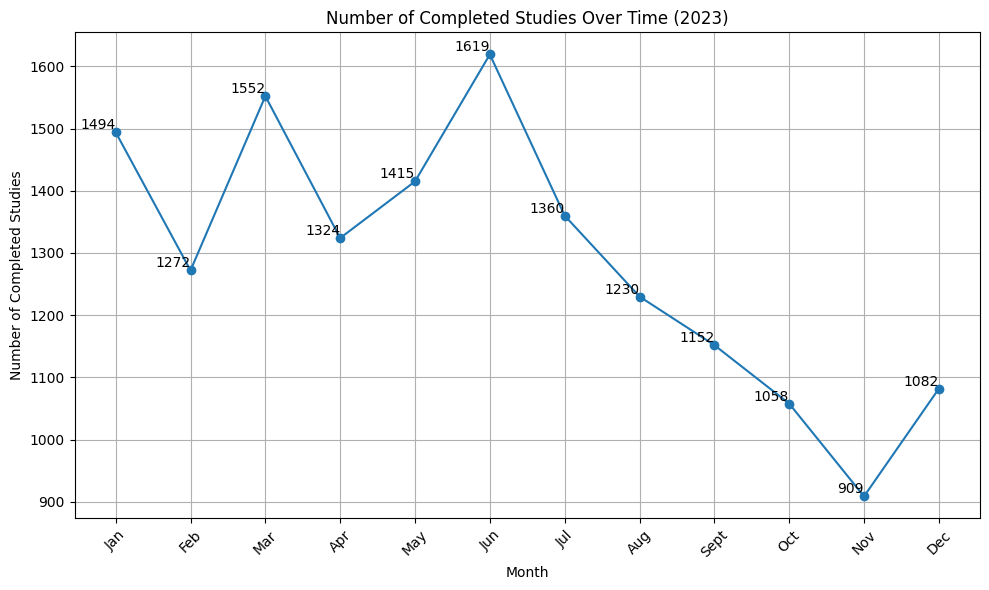

In [0]:
import matplotlib.pyplot as plt

# Assuming completed_studies is the RDD containing the result
data = completed_studies.collect()  # Collect the data from RDD

# Separate months and counts from the collected data
months = [item[0] for item in data]
counts = [item[1] for item in data]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(months, counts, marker='o', linestyle='-')

# Add data points on the line
for x, y in zip(months, counts):
    plt.text(x, y, f'{y}', ha='right', va='bottom', fontsize=10)

# Add title and labels
plt.title('Number of Completed Studies Over Time (2023)')
plt.xlabel('Month')
plt.ylabel('Number of Completed Studies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.grid(True)  # Add grid for better visualization
plt.show()



In [0]:
# FURTHER ANALYSIS 6
# TOP 5 CLINICAL TRIAL STATUS WITH THEIR FREQUENCIES

Status_delimeter = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": ",",
    "clinicaltrial_2020": ",",
}
Status_column_index = Clinical_RDD_Clean.first().index('Status')

Clinical_RDD_Clean.flatMap(lambda x: x[Status_column_index].split(Status_delimeter[fileroot])).filter(lambda row: row != 'Status').filter(lambda row: row != '').map(lambda x: (x, 1)).reduceByKey(lambda a,b: a + b).sortBy(lambda x: x[1], ascending=False).take(5)

[('COMPLETED', 263498),
 ('RECRUITING', 66158),
 ('UNKNOWN', 64813),
 ('TERMINATED', 28022),
 ('NOT_YET_RECRUITING', 20098)]

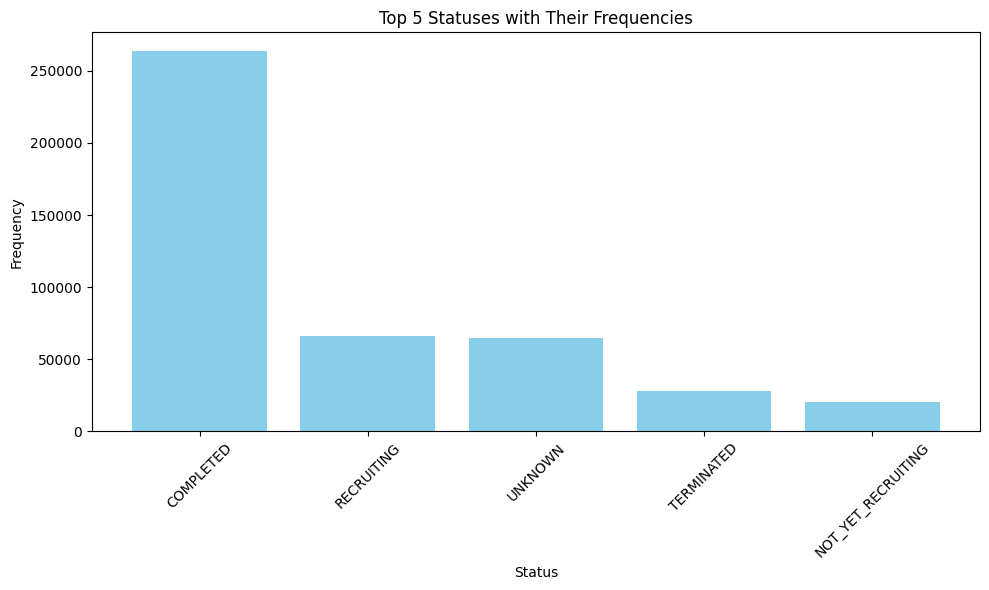

In [0]:
import matplotlib.pyplot as plt

# Define the delimiter for the Status column based on the clinical trial data
status_delimiter = {
    "clinicaltrial_2023": "\t",
    "clinicaltrial_2021": ",",
    "clinicaltrial_2020": ",",
}

# Extract status data based on the specified clinical trial year
status_column_index = Clinical_RDD_Clean.first().index('Status')
status_rdd = Clinical_RDD_Clean.flatMap(lambda x: x[status_column_index].split(status_delimiter[fileroot])) \
                              .filter(lambda row: row != 'Status') \
                              .filter(lambda row: row != '') \
                              .map(lambda x: (x, 1)) \
                              .reduceByKey(lambda a, b: a + b) \
                              .sortBy(lambda x: x[1], ascending=False)

# Get the top 5 statuses with their frequencies
top_statuses = status_rdd.take(5)

# Extract status and frequency data
statuses = [status[0] for status in top_statuses]
frequencies = [status[1] for status in top_statuses]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(statuses, frequencies, color='skyblue')

# Add labels and title
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.title('Top 5 Statuses with Their Frequencies')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

